In [1]:
#Step1: Necessery imports
import pandas as pd
import numpy as np
import plotly as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame




#Step2: Loading the data 
#Change the csv file for another brand
#Added Data types for memory optimization and faster loading
data = pd.read_csv('catsvdogs.csv')
            
print(data.info()) 

/kaggle/input/cat-vs-dog-popularity-in-us/catsvdogs.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            49 non-null     object 
 1   Number of Households (in 1000)      49 non-null     object 
 2   Percentage of households with pets  49 non-null     float64
 3   Number of Pet Households (in 1000)  49 non-null     object 
 4   Percentage of Dog Owners            49 non-null     float64
 5   Dog Owning Households (1000s)       49 non-null     object 
 6   Mean Number of Dogs per household   49 non-null     float64
 7   Dog Population (in 1000)            49 non-null     object 
 8   Percentage of Cat Owners            49 non-null     float64
 9   Cat Owning Households               49 non-null     object 
 10  Mean Number of Cats                 49 non-null     floa

# Pets Ownership -  Cats vs Dog Popularity in US

Population and ownership by household of dogs and cats broken down by state via American Veterinary Medical Association.

![](https://imagesvc.meredithcorp.io/v3/mm/gif?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F35%2F2016%2F11%2F04021528%2Fkittens-turn-table.gif)

![](https://imagesvc.meredithcorp.io/v3/mm/gif?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F35%2F2016%2F11%2F04021526%2Fpuppy-pile-gif.gif)


# Describing the data

In [2]:
#Step3:Describing the data
data.describe()

,Percentage of households with pets,Percentage of Dog Owners,Mean Number of Dogs per household,Percentage of Cat Owners,Mean Number of Cats,Unnamed: 12
count,49.000000,49.000000,49.000000,49.000000,49.000000,0.0
mean,56.859184,36.973469,1.587755,31.642857,2.040816,NaN
std,6.931688,6.671169,0.202724,5.683162,0.191397,NaN
min,21.900000,13.100000,1.100000,11.600000,1.700000,NaN
25%,53.600000,32.900000,1.400000,29.000000,1.900000,NaN
50%,56.800000,36.600000,1.600000,31.300000,2.000000,NaN
75%,61.300000,42.500000,1.700000,33.800000,2.200000,NaN
max,70.800000,47.900000,2.100000,49.500000,2.600000,NaN


# Percentage of households with pets

In [3]:
fig = px.bar(data, y='Percentage of households with pets', x='Location')
fig.show();

In [4]:
fig = px.pie(data, values='Percentage of households with pets', names='Location')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show();

# Percentage of Dog Owners 2021

In [5]:
fig = px.bar(data, y='Percentage of Dog Owners', x='Location')
fig.show();

In [6]:
fig = px.pie(data, values='Percentage of Dog Owners', names='Location')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show();

# Mean Number of Dogs per household


In [7]:
fig = px.bar(data, y='Mean Number of Dogs per household', x='Location')
fig.show();

# Percentage of Cat Owners

In [8]:
fig = px.bar(data, y='Percentage of Cat Owners', x='Location')
fig.show();

In [9]:
fig = px.pie(data, values='Percentage of Cat Owners', names='Location')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show();

# Mean Number of Cats


In [10]:
fig = px.bar(data, y='Mean Number of Cats', x='Location')
fig.show();

In [11]:
fig = px.pie(data, values='Mean Number of Cats', names='Location')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show();

# Finding Influences - Correlation Matrix (impact relationship with numbers)

In [17]:
#Finding correlations

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
colorscale='icefire',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='Correlation Matrix (impact relationship with numbers)',
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=800, height=800,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  template="simple_white"
                  )
fig.show()

# Pairplots and Linear Predictions

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


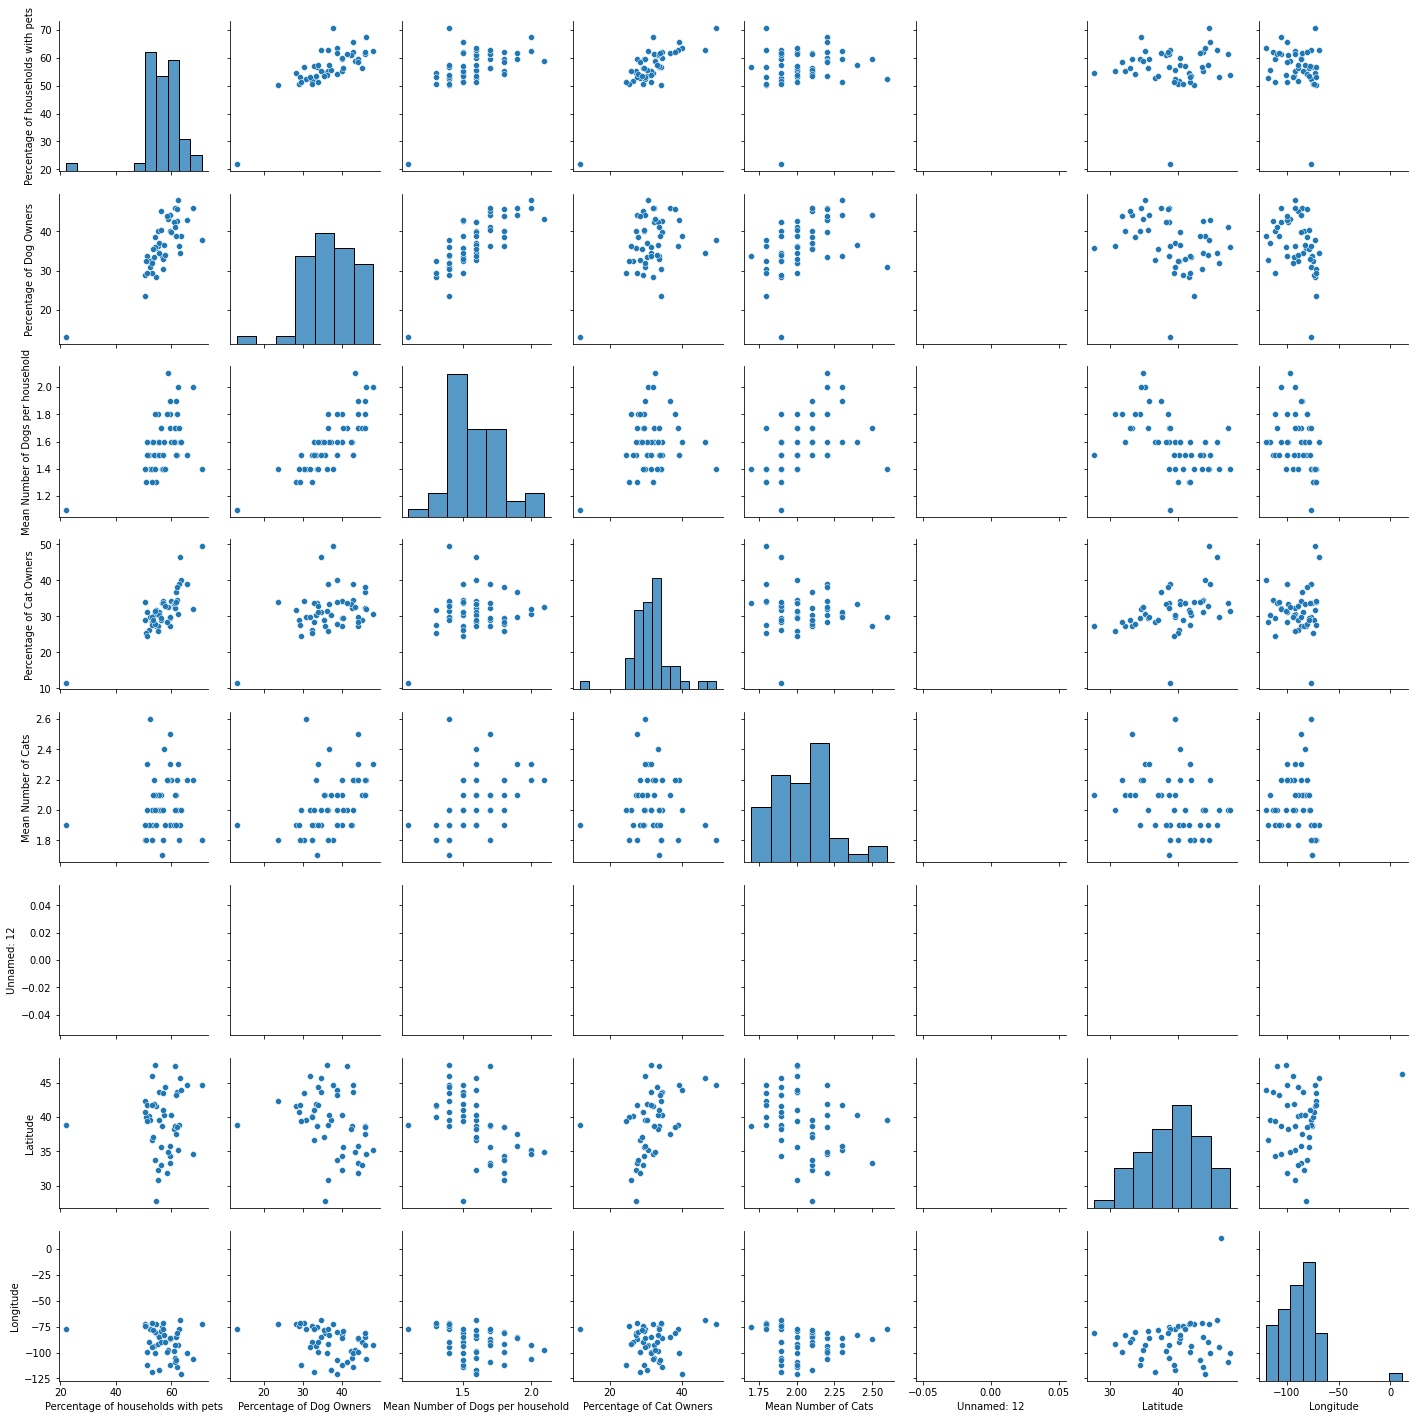

In [18]:
sns.pairplot(data,palette='bright')
%time

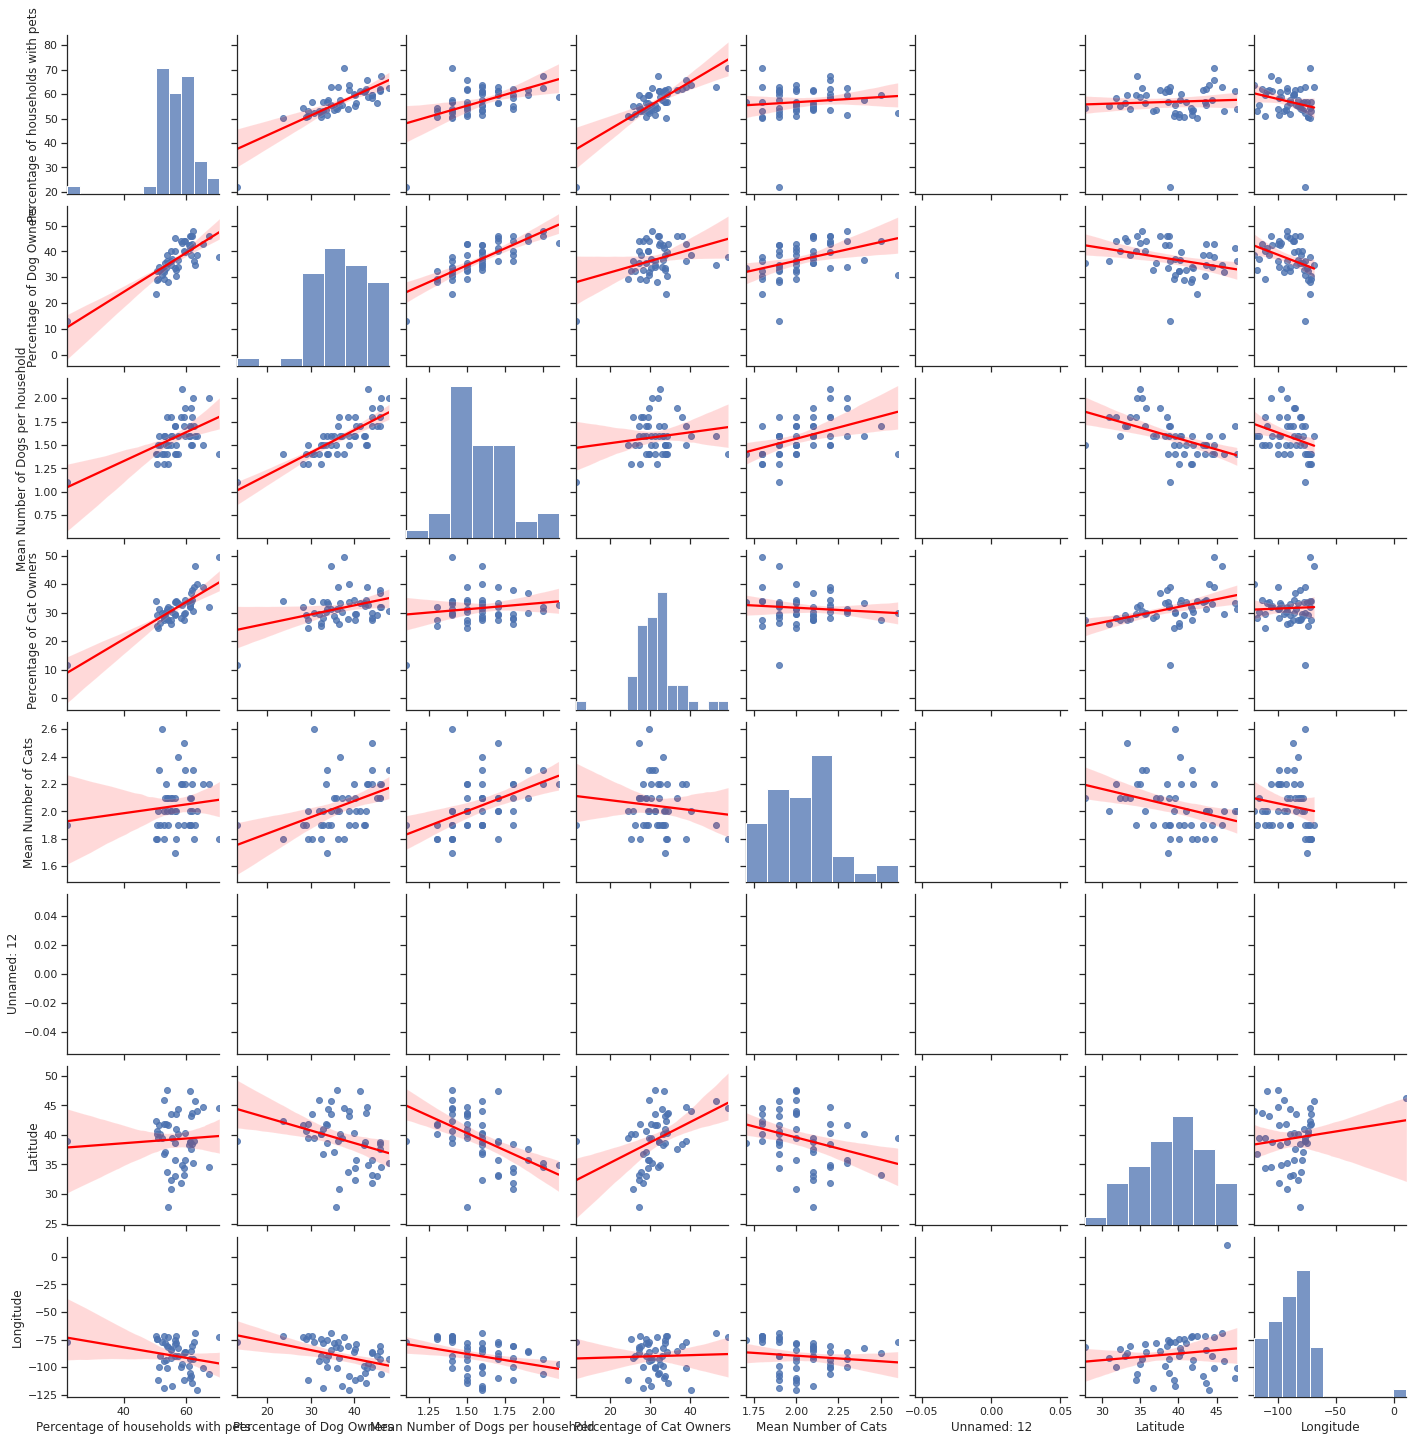

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [19]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()
%time